# K-Means Algorithm using sklearn and iris dataset

  The code shows the implementation of k-means algorithm using iris dataset (obtained from kaggle).
  Note that we let the user choose value of k (number of clusters) after plotting inertia values for k in a fixed range.

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename='Iris.csv'
df=pd.read_csv(filename)
print(df.head())
print(df['Species'].value_counts())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


In [40]:
required_df=df.iloc[:,1:5]
print(required_df.head())
print(required_df.info())
required_df.fillna(required_df.mean(),inplace=True)
print(required_df.isna().sum())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


In [34]:
kmeans3=KMeans(n_clusters=3,init='k-means++',n_init=5,max_iter=60,tol=0.001,verbose=0)
data=np.array(required_df)
kmeans3.fit_predict(data)
print(kmeans3.labels_)
print(kmeans3.get_params())
print(kmeans3.cluster_centers_)
print(kmeans3.inertia_)
print(kmeans3.n_iter_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 60, 'n_clusters': 3, 'n_init': 5, 'n_jobs': None, 'precompute_distances': 'auto', 'random_state': None, 'tol': 0.001, 'verbose': 0}
[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
78.94084142614602
4


10


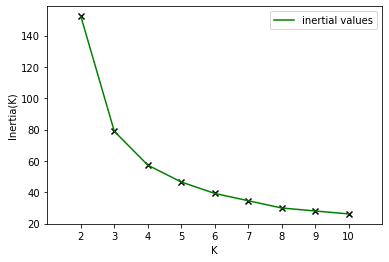

In [84]:
#in this example we knew the number of clusters
#for user input we will try k values from 2 to user input and use elbow method to find best value of k
#note after we plot inertia graph with respect to k it is upon user to input k else some sort of tolerance value can be given 
# for selection of k
inertia=[]

upper_limk=10
for i in range(2,upper_limk+1):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=60,verbose=0, tol=1e-4,n_init=5)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

kvals=range(2,upper_limk+1)

plt.plot(kvals,inertia,c='green')
plt.scatter(kvals,inertia,marker='x',c='black')
plt.xlim(1,upper_limk+1)
plt.xlabel('K')
plt.xticks(range(2,upper_limk+1))
plt.ylabel('Inertia(K)')
plt.legend(['inertial values'])
plt.show()

In [87]:
best_val=int(input("Select value of k you want to continue with "))
kmeans=KMeans(n_clusters=best_val,n_init=5,init='k-means++', max_iter=60 , tol=1e-5)
kmeans.fit_predict(data)

print(kmeans.cluster_centers_)
cluster_centers=kmeans.cluster_centers_

Select value of k you want to continue with 3
[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


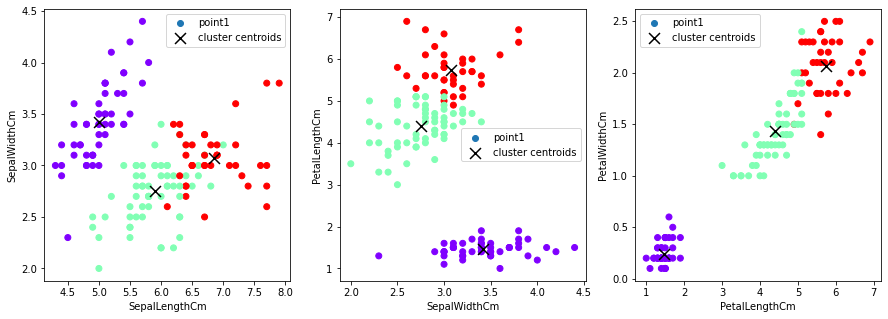

In [92]:
data_cols=list(required_df.columns)

fig=plt.figure(figsize=(15,5*int((len(data_cols)/3))))
for i in range(len(data_cols)-1):
    a=fig.add_subplot(len(data_cols)/3,len(data_cols)-1,i+1)
    plt.scatter(list(required_df[data_cols[i]]),list(required_df[data_cols[i+1]]),c=kmeans.labels_, cmap="rainbow")
    plt.scatter(cluster_centers[:,i],cluster_centers[:,i+1],marker='x',c='black',s=120)
    plt.legend(['point1','cluster centroids'])
    plt.xlabel(data_cols[i])
    plt.ylabel(data_cols[i+1])
    
plt.show()